# Map detected galaxies after 15, 20, 25 years

###  Chiara Mingarelli,  mingarelli@gmail.com, simulation curves from J. A. Ellis

In [1]:
#!/usr/bin/env python
from __future__ import division
import sys, os
import math
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin, log10
import healpy as hp
import plot_mpl2
import collections
from matplotlib.ticker import FormatStrFormatter, LinearLocator, NullFormatter, NullLocator, MultipleLocator

%matplotlib inline
%config InlineBackend.figure_format = "retina"

In [2]:
# simulated CW curves (white noise)
sim1a = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_15.txt") # 2sigma, DP=0.95, 15 yrs
sim2b = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_20.txt") # 2sigma, DP=0.95, 20 yrs
sim3c = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.05_T_25.txt") # 2sigma, DP=0.95, 25 yrs

sim1d = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_15.txt") # 3sigma, DP=0.95, 15 yrs
sim2e = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_20.txt") # 3sigma, DP=0.95, 20 yrs
sim3f = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.003_T_25.txt") # 3sigma, DP=0.95, 25 yrs

sim1g = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_15.txt") # 1e-4, DP=0.95, 15 yrs
sim2h = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_20.txt") # 1e-4, DP=0.95, 20 yrs
sim3i = np.loadtxt("../../detection_curves/cw_simulation_Ared_0_dp_0.95_fap_0.0001_T_25.txt") # 1e-4, DP=0.95, 25 yrs

In [3]:
# simulated frequency and strain
simStrain1 = sim1a[:,1] # 15 yrs, 0 red noise, 2sigma
simFreq1 = sim1a[:,0]
simStrain2 = sim2b[:,1] # 20 yrs, 0 red noise, 2sigma
simFreq2 = sim2b[:,0]
simStrain3 = sim3c[:,1] # 25 yrs, 0 red noise, 2sigma
simFreq3 = sim3c[:,0]

simStrain4 = sim1d[:,1] # 15 yrs, 0 red noise, 3 sigma
simFreq4 = sim1d[:,0]
simStrain5 = sim2e[:,1] # 20 yrs, 0 red noise, 3 sigma
simFreq5 = sim2e[:,0]
simStrain6 = sim3f[:,1] # 25 yrs, 0 red noise, 3 sigma
simFreq6 = sim3f[:,0]

simStrain7 = sim1g[:,1] # 15 yrs, 0 red noise, 1e-4
simFreq7 = sim1g[:,0]
simStrain8 = sim2h[:,1] # 20 yrs, 0 red noise, 1e-4
simFreq8 = sim2h[:,0]
simStrain9 = sim3i[:,1] # 25 yrs, 0 red noise, 1e-4
simFreq9 = sim3i[:,0]



In [4]:
# all realizations
files = []

for i in os.listdir('../../rusty_data/KH13_Reg/29_dex/'):
    if i.endswith('.txt'):
        files.append(i)

In [5]:
len(files)

115281

In [6]:
# RA_tot, DEC_tot, gw_freq_vec, strain_vec, mchirp_rec, q_rec, gal_cat_name, dist_list, mstar_list, save_p, 
# gal_choice, T_z_list, mergRate_list, t2c_list, z_list, r_inf_list, friction_list, hardening_list, num_zeros

In [13]:
# simulated CW curves (red noise right now)
Rsim1a = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_15.txt") # 2sigma, DP=0.95, 15 yrs
Rsim2b = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_20.txt") # 2sigma, DP=0.95, 20 yrs
Rsim3c = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.05_T_25.txt") # 2sigma, DP=0.95, 25 yrs

Rsim1d = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_15.txt") # 3sigma, DP=0.95, 15 yrs
Rsim2e = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_20.txt") # 3sigma, DP=0.95, 20 yrs
Rsim3f = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.003_T_25.txt") # 3sigma, DP=0.95, 25 yrs

Rsim1g = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_15.txt") # 1e-4, DP=0.95, 15 yrs
Rsim2h = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_20.txt") # 1e-4, DP=0.95, 20 yrs
Rsim3i = np.loadtxt("../../detection_curves/cw_simulation_Ared_4e-16_dp_0.95_fap_0.0001_T_25.txt") # 1e-4, DP=0.95, 25 yrs

# simulated frequency and strain
RsimStrain1 = Rsim1a[:,1] # 15 yrs, 0 red noise, 2sigma
RsimFreq1 = Rsim1a[:,0]
RsimStrain2 = Rsim2b[:,1] # 20 yrs, 0 red noise, 2sigma
RsimFreq2 = Rsim2b[:,0]
RsimStrain3 = Rsim3c[:,1] # 25 yrs, 0 red noise, 2sigma
RsimFreq3 = Rsim3c[:,0]

RsimStrain4 = Rsim1d[:,1] # 15 yrs, 0 red noise, 3 sigma
RsimFreq4 = Rsim1d[:,0]
RsimStrain5 = Rsim2e[:,1] # 20 yrs, 0 red noise, 3 sigma
RsimFreq5 = Rsim2e[:,0]
RsimStrain6 = Rsim3f[:,1] # 25 yrs, 0 red noise, 3 sigma
RsimFreq6 = Rsim3f[:,0]

RsimStrain7 = Rsim1g[:,1] # 15 yrs, 0 red noise, 1e-4
RsimFreq7 = Rsim1g[:,0]
RsimStrain8 = Rsim2h[:,1] # 20 yrs, 0 red noise, 1e-4
RsimFreq8 = Rsim2h[:,0]
RsimStrain9 = Rsim3i[:,1] # 25 yrs, 0 red noise, 1e-4
RsimFreq9 = Rsim3i[:,0]


In [14]:
#gets data from the final skies
final_file = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt")
final_galname = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt", usecols = 0, dtype='str')
final_filename = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt", usecols = -1, dtype='str')
final_size = len(final_file)

#finds the loudest source from all the detectable sources from final skies
final_strain = final_file[:,6]
loudest_index = final_strain.argmax()
loudest_galname = final_galname[loudest_index]
loudest_filename = str((final_filename[loudest_index])[2:-1])
print(loudest_index)
print(loudest_galname)
print(loudest_filename)
print(max(final_strain))

241
NGC1316
KH13_90747.txt
5.057486484657516e-14


In [199]:
print(final_strain[loudest_index])
print(np.max(final_strain))

5.057486484657516e-14
5.057486484657516e-14


In [15]:
"""ONLY RUN WITH THE LOUDEST"""
# points for one sky

allF = []
allS = []
allMc = []
allQ = []
allPi = []
allLum = []
all_name = []
allD = []

# condensed here for an exmple realization
allFile = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+str(loudest_filename), usecols=(2,3,4,5,7,8,9))
allF.append(allFile[:,0])
allS.append(allFile[:,1])
allMc.append(allFile[:,2])
allQ.append(allFile[:,3])
allD.append(allFile[:,4])
allLum.append(allFile[:,5]) 
allPi.append(allFile[:,6])
all_name.append(np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+str(loudest_filename), usecols=(6), dtype = "str"))

In [ ]:
max(allS[0])
i = allS[0].argmax()
print(allF[0][i])

In [6]:
# all points for detected skies
"""DONT RUN WITH LOUDEST SKY EXAMPLE"""
allF = []
allS = []
allMc = []
allQ = []
allPi = []
allLum = []
all_name = []
allD = []

for filename in files:
    allFile = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+filename, usecols=(2,3,4,5,7,8,9))
    if(len(allFile) != 0):
        try:
            allF.append(allFile[:,0])
            allS.append(allFile[:,1])
            allMc.append(allFile[:,2])
            allQ.append(allFile[:,3])
            allD.append(allFile[:,4])
            allLum.append(allFile[:,5]) 
            allPi.append(allFile[:,6])
            all_name.append(np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+filename, usecols=(6), dtype = "U9"))
        except Exception as e:
            fake = np.zeros((1, 7))
            fake[0] = allFile
            allF.append(fake[:,0])
            allS.append(fake[:,1])
            allMc.append(fake[:,2])
            allQ.append(fake[:,3])
            allD.append(fake[:,4])
            allLum.append(fake[:,5]) 
            allPi.append(fake[:,6])
            all_name.append([np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+filename, usecols=(6), dtype = "U9")])




In [7]:
allF = np.array(allF)
allF.shape

#shoudl print 1 for single sky

(115281,)

# Which sources can be detected with simulated IPTA curves?


In [ ]:
# Sources above curve?

In [ ]:
def find_nearest(array,value):
    # http://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array
    idx = (np.abs(array-value)).argmin()
    return idx #return index of array

In [ ]:
# New sims used below

In [ ]:
# Sources detected the most timesd ("Hit List")

In [ ]:
def find_detected_sr(simFreq,simStrain):
    iptaDetectedF = []
    iptaDetectedS = []
    iptaDetectedN = []
    iptaDetectedMc = []
    iptaDetectedQ = []
    iptaDetectedPi = []
    iptaDetectedLum = []
    iptaDetectedDist = []

    for i in range(len(allF)):
        for j in range(len(allF[i])):
            compareFreq = find_nearest(simFreq, allF[i][j]) # find the closest freq in inteprolated values to source freq, report index
            simStrainX = simStrain[compareFreq] # what is the strain of that source?
            if allS[i][j] > simStrainX: # can we detect that source?
                iptaDetectedF.append(allF[i][j]) # add it to a detected list
                iptaDetectedS.append(allS[i][j]) 
                iptaDetectedN.append(all_name[i][j]) 
                iptaDetectedMc.append(allMc[i][j]) 
                iptaDetectedQ.append(allQ[i][j]) 
                iptaDetectedPi.append(allPi[i][j]) 
                iptaDetectedLum.append(allLum[i][j]) 
                iptaDetectedDist.append(allD[i][j])
    return iptaDetectedF, iptaDetectedS, iptaDetectedN, iptaDetectedMc, iptaDetectedQ, iptaDetectedPi, iptaDetectedLum, iptaDetectedDist

In [ ]:
#gets name for all detected SMBHB systems emitting gw in PTA  band
final_detected = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt")
name = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt", usecols = (0), dtype = "U9")
strain_vec_all = final_detected[:,6]
file_size_all = len(name)

print(name)
#gets RA and DEC for all detected galaxies from above
RA_tot_all = np.zeros(len(name))
DEC_tot_all = np.zeros(len(name))
freq_all = np.zeros(len(name))


files = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt", usecols = (-1), dtype = None)

for i in range(len(name)):
    file_RA = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+str(str(files[i])[4:-2]), usecols = (0))
    file_DEC = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+str(str(files[i])[4:-2]), usecols = (1))
    file_names = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+str(str(files[i])[4:-2]), usecols = (6), dtype = "U9")
    file_freq = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+str(str(files[i])[4:-2]), usecols = (2))
    file_strain = np.genfromtxt("../../rusty_data/KH13_Reg/29_dex/"+str(str(files[i])[4:-2]), usecols = (3))


    #find index of detectable galaxy
    gal_ind = np.where(file_names == name[i])[0][0]
    
    RA_tot_all[i] = file_RA[gal_ind]
    DEC_tot_all[i] = file_DEC[gal_ind]  
    freq_all = file_freq[gal_ind]
    
    

In [ ]:
# 15 yrs white noise,  2 sigma
iptaDetectedF, iptaDetectedS, iptaDetectedN, iptaDetectedMc, iptaDetectedQ, iptaDetectedPi, iptaDetectedLum, \
iptaDetectedDist = find_detected_sr(simFreq1,simStrain1)

# 15 yrs white noise,  3 sigma
iptaDetectedF4, iptaDetectedS4, iptaDetectedN4, iptaDetectedMc4, iptaDetectedQ4, iptaDetectedPi4, iptaDetectedLum4, \
iptaDetectedDist4 = find_detected_sr(simFreq4,simStrain4)
            
# 15 yrs white noise, 1e-4 sigma
iptaDetectedF7, iptaDetectedS7, iptaDetectedN7, iptaDetectedMc7, iptaDetectedQ7, iptaDetectedPi7, iptaDetectedLum7, \
iptaDetectedDist7 = find_detected_sr(simFreq7,simStrain7)

In [ ]:
# 20 yrs white noise, 2 sigma
iptaDetectedF2, iptaDetectedS2, iptaDetectedN2, iptaDetectedMc2, iptaDetectedQ2, iptaDetectedPi2, iptaDetectedLum2, \
iptaDetectedDist2 = find_detected_sr(simFreq2,simStrain2)
                        
# 20 yrs white noise, 3 sigma
iptaDetectedF5, iptaDetectedS5, iptaDetectedN5, iptaDetectedMc5, iptaDetectedQ5, iptaDetectedPi5, iptaDetectedLum5, \
iptaDetectedDist5 = find_detected_sr(simFreq5,simStrain5)
        
# 20 yrs white noise, 1e-4 sigma
iptaDetectedF8, iptaDetectedS8, iptaDetectedN8, iptaDetectedMc8, iptaDetectedQ8, iptaDetectedPi8, iptaDetectedLum8, \
iptaDetectedDist8 = find_detected_sr(simFreq8,simStrain8)

In [ ]:
# 25 yrs white noise, 2 sigma
iptaDetectedF3, iptaDetectedS3, iptaDetectedN3, iptaDetectedMc3, iptaDetectedQ3, iptaDetectedPi3, iptaDetectedLum3, \
iptaDetectedDist3 = find_detected_sr(simFreq3,simStrain3)
        
# 25 yrs white noise, 3 sigma
iptaDetectedF6, iptaDetectedS6, iptaDetectedN6, iptaDetectedMc6, iptaDetectedQ6, iptaDetectedPi6, iptaDetectedLum6, \
iptaDetectedDist6 = find_detected_sr(simFreq6,simStrain6)
            
# 25 yrs white noise, 1e-4 sigma
iptaDetectedF9, iptaDetectedS9, iptaDetectedN9, iptaDetectedMc9, iptaDetectedQ9, iptaDetectedPi9, iptaDetectedLum9, \
iptaDetectedDist9 = find_detected_sr(simFreq9,simStrain9)


In [201]:
# 25 yrs white noise, 3 sigma
iptaDetectedF6, iptaDetectedS6, iptaDetectedN6, iptaDetectedMc6, iptaDetectedQ6, iptaDetectedPi6, iptaDetectedLum6, \
iptaDetectedDist6 = find_detected_sr(simFreq6,simStrain6)

In [ ]:
# 25 yrs RED noise, 3 sigma
RiptaDetectedF6, RiptaDetectedS6, RiptaDetectedN6, RiptaDetectedMc6, RiptaDetectedQ6, RiptaDetectedPi6, RiptaDetectedLum6, \
RiptaDetectedDist6 = find_detected_sr(RsimFreq6,RsimStrain6)

In [ ]:
RiptaDetectedF1, RiptaDetectedS1, RiptaDetectedN1, RiptaDetectedMc1, RiptaDetectedQ1, RiptaDetectedPi1, RiptaDetectedLum1, \
RiptaDetectedDist1 = find_detected_sr(RsimFreq1,RsimStrain1)

In [ ]:
RiptaDetectedF2, RiptaDetectedS2, RiptaDetectedN2, RiptaDetectedMc2, RiptaDetectedQ2, RiptaDetectedPi2, RiptaDetectedLum2, \
RiptaDetectedDist2 = find_detected_sr(RsimFreq2,RsimStrain2)

In [ ]:
RiptaDetectedF3, RiptaDetectedS3, RiptaDetectedN3, RiptaDetectedMc3, RiptaDetectedQ3, RiptaDetectedPi3, RiptaDetectedLum3, \
RiptaDetectedDist3 = find_detected_sr(RsimFreq3,RsimStrain3)

In [ ]:
#15 years
print(len(iptaDetectedF))
print(len(iptaDetectedF4))
print(len(iptaDetectedF7))

print("")

#20 years
print(len(iptaDetectedF2))
print(len(iptaDetectedF5))
print(len(iptaDetectedF8))

print("")

#25 years
print(len(iptaDetectedF3))
print(len(iptaDetectedF6))
print(len(iptaDetectedF9))

print("")

#15 years
print((len(iptaDetectedF))/len(files))
print((len(iptaDetectedF4))/len(files))
print((len(iptaDetectedF7))/len(files))

print("")

#20 years
print((len(iptaDetectedF2)) /len(files))
print((len(iptaDetectedF5))/len(files))
print((len(iptaDetectedF8))/len(files))

print("")

#25 years
print((len(iptaDetectedF3))/len(files))
print((len(iptaDetectedF6))/len(files))
print((len(iptaDetectedF9))/len(files))

# PLOTTING AND SORTING LISTS OF GALAXIES

In [ ]:
#Example: How to ask how many times a galaxy was found, with NGC 4486

In [202]:
#white noise
catalog_list = iptaDetectedN6 #White noise 25 year 3 sigma

#red_noise
#catalog_list = RiptaDetectedN6 #red noise 25 year 3 sigma

In [203]:
histo_data = dict((x, catalog_list.count(x)) for x in catalog_list)
d= histo_data


In [204]:
# try using a sorted list

In [205]:
histo_data = sorted(histo_data.items(), key=lambda x:x[1]) # sort histogram by count


In [206]:
value = np.zeros([len(histo_data)])
label = []

for j in range(len(histo_data)):
    value[j] = histo_data[j][1]
    label.append(histo_data[j][0])

In [207]:
def find_gal_idx_4val(nameList, val):
    ans = [i for i, x in enumerate(nameList) if x >= val]
    return ans

In [208]:
value = value.tolist()

In [213]:
# What is the minimum number of counts we are interested in for plotting?
minval = 400
goodCounts = find_gal_idx_4val(value, minval)

In [214]:
goodCounts

[4816, 4817, 4818, 4819, 4820]

In [215]:
toPlot_val = value[goodCounts[0]:goodCounts[-1]+1]
toPlot_name = label[goodCounts[0]:goodCounts[-1]+1]

In [216]:
toPlot_name 

['NGC4472', 'NGC3115', 'NGC1399', 'NGC4374', 'NGC4594']

In [109]:
# RED NOISE SOURCES

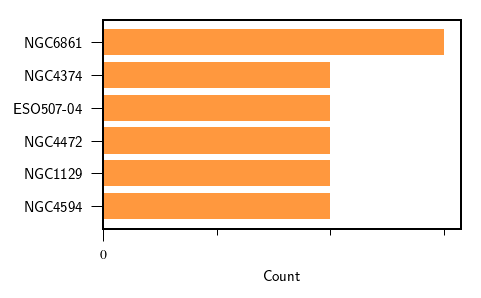

In [110]:
X = np.arange(len(toPlot_val))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(X, toPlot_val, alpha=0.8, linewidth = 0.4, color = "C1")
ax.set_yticks(X)
plt.setp(ax.get_yticklabels(), fontsize=7)
ax.set_yticklabels(toPlot_name)
majorLocator = MultipleLocator(4)
minorLocator = MultipleLocator(1)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.xticks(np.arange(0,))
plt.xlabel("Count")
#plt.title("25 year dataset, FAP $3\sigma$, DP$=95\%$, Red Noise")
#plt.ylabel("Galaxy Name")
plt.tight_layout()
plt.savefig("plots_sigma_87/step_5/RN_3sigma_kh13_sigma_87.pdf")

# PLOTTING FOR WHITE NOISE SOURCES

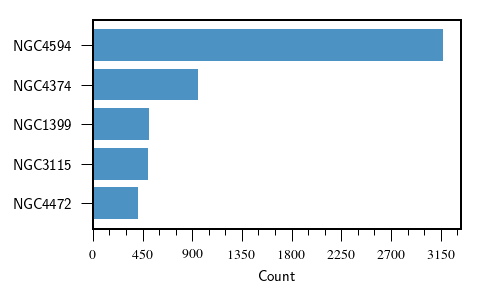

In [222]:
X = np.arange(len(toPlot_val))
fig = plt.figure()
ax = fig.add_subplot(111)
ax.barh(X, toPlot_val, alpha=0.8, linewidth = 0.4, color = "C0")
ax.set_yticks(X)
#plt.setp(ax.get_yticklabels(), fontsize=6)
ax.set_yticklabels(toPlot_name)
majorLocator = MultipleLocator(450)
minorLocator = MultipleLocator(150)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.xticks(np.arange(0,))
plt.xlabel("Count")
#plt.title("25 year dataset, FAP $3\sigma$, DP$=95\%$, White Noise")
#plt.ylabel("Galaxy Name")
plt.tight_layout()
plt.savefig("plots_bul_29/step_5/WN_3sigma_kh13_sigma_29_ppt.pdf")


In [16]:
# plotting preamble (credit J. Ellis)

fig_width_pt = 245.27 #513.17           # Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.0/72.27               # Convert pt to inches
golden_mean = (np.sqrt(5)-1.0)/2.0      # Aesthetic ratio
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height =fig_width*golden_mean       # height in inches
fig_size = [fig_width,fig_height]

params = {'backend': 'pdf',
        'axes.labelsize': 7,
        'lines.markersize': 2,
        'font.size': 7,
        'xtick.major.size':6,
        'xtick.minor.size':3,  
        'ytick.major.size':6,
        'ytick.minor.size':3, 
        'xtick.major.width':0.5,
        'ytick.major.width':0.5,
        'xtick.minor.width':0.5,
        'ytick.minor.width':0.5,
        'lines.markeredgewidth':1,
        'axes.linewidth':1.0,
        'legend.fontsize': 7,
        'xtick.labelsize': 7,
        'ytick.labelsize': 7,
        'savefig.dpi':200,
        'path.simplify':True,
        'font.serif':'Times',
        'text.latex.preamble': [r'\usepackage{amsmath}'],
        'text.usetex':True,
        #'axes.color_cycle': ['b', 'lime', 'r', 'purple', 'g', 'c', 'm', 'orange', 'darkblue', \
        #                        'darkcyan', 'y','orangered','chartreuse','brown','deeppink','lightgreen', 'k'],
        #'font.serif':cm,
        'figure.figsize': fig_size}
plt.rcParams.update(params)

In [17]:
def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    # for nice looking bins
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

In [4]:
# detected sky realizations
sky_file = np.genfromtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt",dtype=None)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  


In [5]:
detF = []
detS = []
for ii in range(len(sky_file)):
    detF.append(sky_file[ii][5])
    detS.append(sky_file[ii][6])
print(len(detS))

352


In [6]:
# read in sensitivity curve. This is an upper limit curve, not a detection curve, needs to be updated
dataSB_W = np.genfromtxt("../SensWhole.dat",skip_header=1)#, dtype=float, sep="  ")

In [18]:
newF = []
newS = []
newMc = []

In [19]:
for j in range(len(allF)):
    newF.append(allF[j])
    newS.append(allS[j])
    newMc.append(allMc[j])

In [20]:
flatF = [item for sublist in newF for item in sublist]
flatS = [item for sublist in newS for item in sublist]
flatMc = [item for sublist in newMc for item in sublist]

In [22]:
for i in range(len(flatF)):
    if flatF[i] < min(simFreq8):
        flatF[i] = 1.41257006987e-09
print(flatF)

[2.4762890971935963e-09, 1.0951501970559275e-09, 1.41257006987e-09, 4.9917843412476475e-09, 1.5021478571417893e-09, 3.413273235707184e-09, 3.15564824857284e-09, 1.4412487717823718e-09, 1.5551052425667004e-09, 3.289641160902164e-09, 1.506340484501666e-09, 1.1014739036587116e-09, 1.7135007568108558e-09, 1.485788735696279e-09]


# Comment and uncomment to make different FAP curves

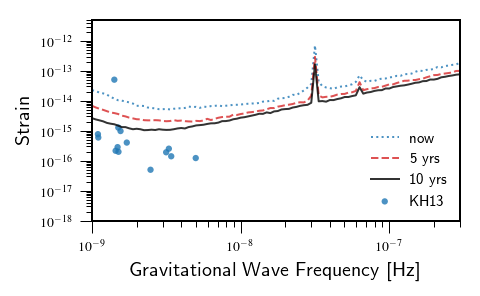

In [25]:
fig = plt.figure()
ax = plt.subplot(111)

plt.scatter(flatF, flatS, edgecolors='none', color='C0', alpha=0.8, s=10, rasterized=True, label = "KH13") #skies
#plt.scatter(detF, detS, edgecolors='none', color='C0', alpha=0.8, s=9, rasterized=True, label = "KH13") #skies
#plt.scatter(loudF, loudS, edgecolors='none', color='C3', alpha=0.8, s=10, rasterized=True) #skies
#plt.scatter(3.339870274455976e-10,5.057486484657516e-14, color = "C2")


#plt.loglog(dataSB_W[:,0], dataSB_W[:, 1], color ='black') #sensitivity
#plt.loglog(dataSB_W[:,0], dataSB_W[:, 1], color ='black', label = 'Current EPTA') #sensitivity
# EPTA is really 7-18 yrs baselines up to 2014; Desvignes et al 2016

#plt.loglog(RsimFreq1,RsimStrain1,  label='15 yrs', lw = 1, linestyle = ":", color = 'C0',alpha = 0.8)#2sigma
#plt.loglog(simFreq4,simStrain4,  label='15 yrs', lw = 1, linestyle = ":", color = 'C0', alpha = 0.8)
plt.loglog(simFreq7,simStrain7,  label='now', lw = 1, linestyle = ":", color = 'C0', alpha = 0.8)


#plt.loglog(RsimFreq2,RsimStrain2,  label='20 yrs', lw = 1, linestyle = "--", color = 'C3',alpha = 0.8)#2sigma
#plt.loglog(simFreq5,simStrain5,  label='20 yrs', lw = 1, linestyle = "--", color = 'C3', alpha = 0.8)
plt.loglog(simFreq8,simStrain8,  label='5 yrs', lw = 1, linestyle = "--", color = 'C3', alpha = 0.8)

#plt.loglog(RsimFreq3,RsimStrain3,  label='25 yrs', lw = 1, linestyle = "-",  color = 'black',alpha = 0.8) #2sigma
#plt.loglog(simFreq6,simStrain6,  label='25 yrs', lw = 1, linestyle = "-", color = 'black', alpha = 0.8)
plt.loglog(simFreq9,simStrain9,  label='10 yrs', lw = 1, linestyle = "-", color = 'black', alpha = 0.8) #1e-4


plt.xlim(1e-9,3e-7)
plt.ylim(1e-18, 5e-12)
plt.xlabel("Gravitational Wave Frequency [Hz]", size = "10")
plt.ylabel("Strain", size = "10")
plt.tight_layout() 
ax.legend(frameon = False, loc = "lower right")
#plt.title("KH13: Time to Detection")
plt.legend(frameon=False,loc=4)
#plt.savefig("plots_kh13_29/step_5/detetcion_probability_kh13_29.pdf")
plt.savefig("plots_bul_29/step_5/loudest_sky_detetcion_probability_bul_29_w_color_ppt_2.pdf")



#color = '#1f77b4' (blue) , '#ff7f0e' (orange), '#2ca02c' (green), '#d62728' (red), #9467bd (purple)

In [ ]:
"""Count how many are above the  epta line"""
count = 0
epta_strain = dataSB_W[:,1]
epta_freq = dataSB_W[:,0]

def find_nearest(array,value):
    # http://stackoverflow.com/questions/2566412/find-nearest-value-in-numpy-array#
    idx = (np.abs(array-value)).argmin()
    return idx #return index of array

for i in range(len(detS)):
    ind = find_nearest(epta_freq, detF[i])
    if S[i] > epta_strain[ind]:
        count+=1
        
#printed number is the number of sources ABOVE the epta strain line
print(count)


In [165]:
"""get chirp mass for all points above the curve lines"""
strain_15 = simStrain7
freq_15 = simFreq7

strain_20 = simStrain8
freq_20 = simFreq8

strain_25 = simStrain9
freq_25 = simFreq9

mc_above = []


def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx #return index of array

for i in range(len(flatS)):
    ind = find_nearest(freq_15, flatF[i])
    if flatS[i] > strain_15[ind]:
        mc_above.append(flatMc[i])


In [166]:

log_mc = np.log10(mc_above)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


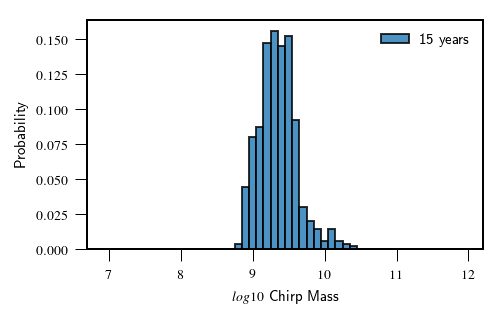

In [167]:
bin_list = auto_bin(0.1,7,12)

weights_mc = hist_weight(log_mc)
plt.hist(log_mc, bin_list, weights = weights_mc, alpha = 0.8, align='left', edgecolor = 'black', label = "15 years")

plt.legend(frameon=False)
plt.tight_layout()

plt.xlabel("$log10$ Chirp Mass")
plt.ylabel("Probability")
plt.savefig("plots_bul_29/step_5/above_mc_distribution_bul_29.pdf")



In [ ]:
print(detS,dataSB_W[:, 1] )

# Histograms for 25 yr detected skies

In [ ]:
def find_gal_idx(nameList, name):
    ans = [i for i, x in enumerate(nameList) if x == name]
    return ans

def find_gal_dec_idx(nameList, dec):
    ans = [i for i, x in enumerate(nameList) if x >= dec]
    return ans

def find_gal_dec_idx_neg(nameList, dec):
    ans = [i for i, x in enumerate(nameList) if x <= dec]
    return ans

def hist_weight(lst):
    return np.ones_like(lst)/len(lst)

def auto_bin(bin_size, min_edge, max_edge):
    #bin_size = 0.05; min_edge = -3.5; max_edge = -1
    N = (max_edge-min_edge)/bin_size; Nplus1 = N + 1
    bin_list = np.linspace(min_edge, max_edge, Nplus1)
    return bin_list

In [ ]:
#iptaDetectedF9, iptaDetectedS9, iptaDetectedMc9,iptaDetectedQ9,iptaDetectedPi9,iptaDetectedLum9, iptaDetectedDist9)

rn_proj = np.loadtxt("../../detectedSkies/final_skies/kh13_mbul_29_final.txt")

In [ ]:
bin_list = auto_bin(0.1,-15,-13)
weights1 = hist_weight(np.log10(iptaDetectedS6))
weights2 = hist_weight(np.log10(RiptaDetectedS6))
plt.hist(np.log10(iptaDetectedS6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         label = "white noise", color = "C0", weights = weights1)
plt.hist(np.log10(RiptaDetectedS6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         label = "red noise", color = "C1", weights = weights2)
#plt.xlim(-9.7,-7.7)
plt.xlabel(r"Distribution of strain $\log_{10}(h)$, 25 year data")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("plots_bul_58/step_5/det_strain_WhiteRed_3sigma_kh13_bul_58.pdf")


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


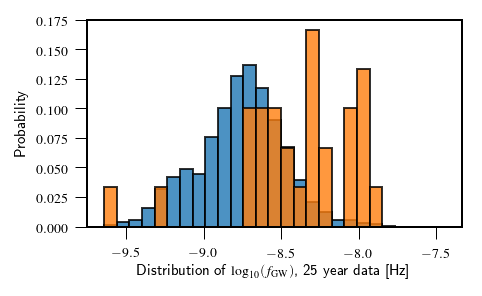

In [140]:
# What is the distribution of frequencies where sources were detected?
bin_list = auto_bin(0.08,-9.6,-7.4)
weights1 = hist_weight(np.log10(iptaDetectedF6))
weights2 = hist_weight(np.log10(RiptaDetectedF6))
plt.hist(np.log10(iptaDetectedF6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         weights = weights1 , label = "white noise")
plt.hist(np.log10(RiptaDetectedF6),bin_list, align='left',  alpha=0.8, edgecolor = 'black', \
         weights = weights2 , label = "red noise")
#plt.xlim(-9.7,-7.7)
plt.xlabel(r"Distribution of $\log_{10}(f_\mathrm{GW})$, 25 year data [Hz]")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("plots_sigma_58/step_5/det_gw_freqs_WhiteRed_3sigma_kh13_bul_58.pdf")



In [141]:
max(mchirp_recLog2)

10.396872374556285

In [8]:
#mchirp_recLog2 = np.log10(RiptaDetectedMc6)
mchirp_recLog = np.log10(iptaDetectedMc6)

bin_list = auto_bin(.07,8.3,10.3)
weights1 = hist_weight(mchirp_recLog)
weights2 = hist_weight(mchirp_recLog2)

plt.hist(mchirp_recLog ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = weights1, \
        label = "white noise")

#plt.hist(mchirp_recLog2 ,bin_list, align='left',  alpha=0.8, edgecolor = 'black', weights = weights2, \
        #label = 'red noise')

plt.xlabel(r"Log Chirp Mass $\mathcal{M}_c$ $[M_\odot]$, 25 year data")
plt.ylabel("Probability")
#plt.legend(frameon=False)
plt.tight_layout()
plt.savefig("plots_bul_29/step_5/det_chirp_WhiteRed_3sigma_kh13_bul_ppt.pdf")



NameError: name 'iptaDetectedMc6' is not defined

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


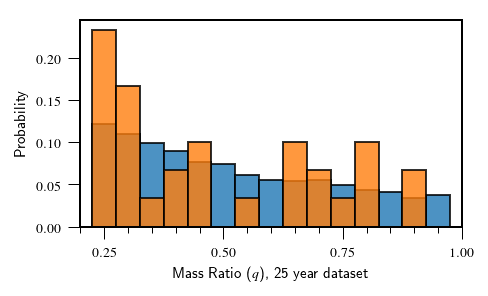

In [143]:
fig = plt.figure()
ax = fig.add_subplot(111)
bin_list = auto_bin(.05,.2,1)
weights1 = hist_weight(iptaDetectedQ6)
weights2 = hist_weight(RiptaDetectedQ6)

plt.hist(iptaDetectedQ6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights1,\
        label = "white noise")
plt.hist(RiptaDetectedQ6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights2, \
        label= 'red noise')

plt.xlabel(r"Mass Ratio ($q$), 25 year dataset ")
plt.ylabel("Probability")
plt.xlim(0.2,1.0)
majorLocator = MultipleLocator(.25)
minorLocator = MultipleLocator(0.05)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
#plt.legend(frameon=False)
plt.tight_layout()

plt.savefig("plots_sigma_87/step_5/mass_ratio_det_WhiteRed_3sigma_kh13_sig_87.pdf")



/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


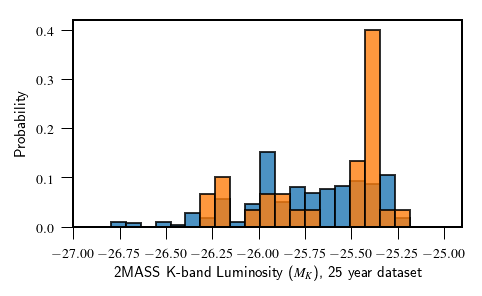

In [144]:
ax = fig.add_subplot(111)
bin_list = auto_bin(.08,-27,-24.9)
weights1 = hist_weight(iptaDetectedLum6)
weights2 = hist_weight(RiptaDetectedLum6)

plt.hist(iptaDetectedLum6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights1)
plt.hist(RiptaDetectedLum6,bin_list, alpha=0.8, edgecolor = 'black', align = 'left', weights = weights2)
plt.xlim(-27,-24.9)
plt.ylabel("Probability")
plt.xlabel(r"2MASS K-band Luminosity ($M_K$), 25 year dataset ")
#plt.legend(frameon=False)
plt.tight_layout()

plt.savefig("plots_sigma_87/step_5/kLum_det_WhiteRed_3sigma_kh13_sig_87.pdf")



/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:19: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


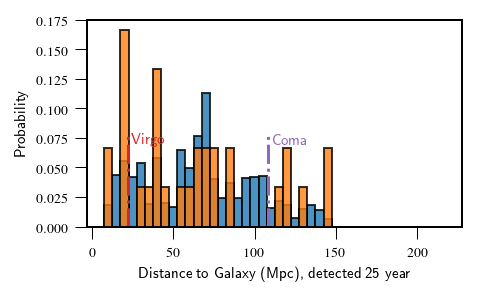

In [145]:
bin_list = auto_bin(5,10,220)
weights1 = hist_weight(iptaDetectedDist6)
weights2 = hist_weight(RiptaDetectedDist6)

ax = fig.add_subplot(111)
plt.hist(iptaDetectedDist6, bin_list, weights=weights1, alpha = 0.8, align='left', edgecolor = 'black',\
         label = "white noise")
plt.hist(RiptaDetectedDist6, bin_list, weights=weights2, alpha = 0.8, align='left', edgecolor = 'black', \
        label = "red noise")


majorLocator = MultipleLocator(25)
minorLocator = MultipleLocator(5)
ax.xaxis.set_minor_locator(minorLocator)
ax.xaxis.set_major_locator(majorLocator)
plt.xlabel("Distance to Galaxy (Mpc), detected 25 year")
plt.ylabel("Probability")
plt.vlines(22,0,.08, colors='C3', linestyles='-.')
plt.vlines(108,0,.08,colors='C4', linestyles='-.')
plt.annotate('Virgo', (24,.07), color = 'C3')
plt.annotate('Coma', (111,.07), color = 'C4')

#plt.legend(frameon=False)
plt.tight_layout()

plt.savefig("plots_sigma_87/step_5/distance_5bins_WhiteRed_3sigma_kh13_sig_87.pdf")



In [190]:
0.83/0.29

2.8620689655172415

In [191]:
0.31/0.15

2.066666666666667

In [192]:
0.17/0.10

1.7

In [193]:
0.90/0.36

2.5

In [194]:
0.35/0.15

2.3333333333333335

In [195]:
0.21/0.09

2.3333333333333335